**DV - Optimizing IT Support Team Performance Using Analytics ( Supportlytics)**

**Module 1** Project Initialization and Dataset Setup

1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np


2. Load the CSV Dataset

In [75]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('infosys dataset.csv')
df.head()

Saving infosys dataset.csv to infosys dataset (1).csv


/tmp/ipython-input-1749417901.py:3: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('infosys dataset.csv')


,Ticket_ID,Ticket_Type,Queue,Priority,Assigned_Team,Category,Status,Created_Date,Resolved_Date,Region
0,IT001,Incident,General Inquiry,low,1 - Junior,Technical,Open,15-06-2024,15-06-2024,EU
1,IT002,Request,Customer Service,medium,2 - Regular,Sales,Open,15-06-2024,15-06-2024,NaN
2,IT003,Request,Customer Service,medium,2 - Regular,Product,In Progress,16-06-2024,16-06-2024,MEA
3,IT004,Incident,Customer Service,high,4 - Management,Breach,Resolved,17-06-2024,17-06-2024,LATAM
4,IT005,Request,Customer Service,medium,1 - Junior,Customer,In Progress,20-06-2024,20-06-2024,NaN


3. Explore Dataset Structure

In [76]:
# Shape of dataset
df.shape

# Column names
df.columns

# Data types
df.dtypes


,0
Ticket_ID,object
Ticket_Type,object
Queue,object
Priority,object
Assigned_Team,object
Category,object
Status,object
Created_Date,object
Resolved_Date,object
Region,object


In [78]:
print(df['Region'].unique())
print(df['Priority'].unique())


['EU' nan 'MEA' 'LATAM' 'APAC']
['low' 'medium' 'high' nan]


4. Check Missing Values

In [79]:
# Count of missing values per column
df.isnull().sum()


,0
Ticket_ID,80000
Ticket_Type,80000
Queue,80000
Priority,80000
Assigned_Team,80000
Category,80046
Status,80000
Created_Date,80000
Resolved_Date,89760
Region,19997


5. Initial Ticket Distribution Analysis

In [80]:
df['Ticket_Type'].value_counts()


,count
Ticket_Type,
Incident,7978
Request,5763
Problem,4184
Change,2075


In [81]:
df['Priority'].value_counts()


,count
Priority,
medium,8144
high,7801
low,4055


In [82]:
df['Category'].value_counts()


,count
Category,
Performance,2795
Bug,2046
Product,1413
IT,1203
Security,1070
...,...
Driver,1
SAP,1
Discrepancy,1


**Module 2** Data Cleaning and Feature Engineering

6. Handle Missing / Incorrect Text Data

In [83]:
# Fill missing categorical values with 'Unknown'
text_cols = ['Ticket_Type', 'Priority', 'Category', 'Country']

for col in text_cols:
    if col in df.columns:
        df[col] = df[col].fillna('Unknown')


7. Convert Date Columns to Datetime

In [84]:
df['Created_Date'] = pd.to_datetime(df['Created_Date'], errors='coerce')
df['Resolved_Date'] = pd.to_datetime(df['Resolved_Date'], errors='coerce')


# Create Resolution Duration in days
df['Resolution_Duration'] = (df['Resolved_Date'] - df['Created_Date']).dt.days


/tmp/ipython-input-3747117620.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Created_Date'] = pd.to_datetime(df['Created_Date'], errors='coerce')
/tmp/ipython-input-3747117620.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Resolved_Date'] = pd.to_datetime(df['Resolved_Date'], errors='coerce')


In [85]:
median_duration = df['Resolution_Duration'].median()
df['Resolution_Duration'] = df['Resolution_Duration'].fillna(median_duration)


8. Create Resolution Duration Feature

In [86]:
# Resolution time in hours
df['Resolution_Duration'] = (df['Resolved_Date'] - df['Created_Date']).dt.total_seconds() / 3600


9. Handle Invalid Resolution Durations

In [87]:
# Remove records where resolution time is negative or null
df = df[df['Resolution_Duration'] >= 0]
df = df.dropna(subset=['Resolution_Duration'])


10. Create Priority Score Feature

In [88]:
priority_map = {
    'Critical': 4,
    'High': 3,
    'Medium': 2,
    'Low': 1,
    'Unknown': 0
}

df['Priority_Score'] = df['Priority'].map(priority_map)


In [89]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Category_Encoded'] = le.fit_transform(df['Category'].fillna('Unknown'))


11. Verify New Features

In [90]:
df[['Created_Date', 'Resolved_Date', 'Resolution_Duration', 'Priority', 'Priority_Score']].head()


,Created_Date,Resolved_Date,Resolution_Duration,Priority,Priority_Score
0,2024-06-15,2024-06-15,0.0,low,NaN
1,2024-06-15,2024-06-15,0.0,medium,NaN
2,2024-06-16,2024-06-16,0.0,medium,NaN
3,2024-06-17,2024-06-17,0.0,high,NaN
4,2024-06-20,2024-06-20,0.0,medium,NaN


12. Save Cleaned Dataset

In [91]:
df.to_csv('cleaned_it_support_data.csv', index=False)


*Data Dictionary*

In [92]:
data_dictionary = {
    'Ticket_ID': 'Unique identifier assigned to each IT support ticket',
    'Ticket_Type': 'Type of ticket such as Incident, Request, or Problem',
    'Queue': 'Support queue where the ticket is routed',
    'Assigned_Team': 'IT team responsible for resolving the ticket',
    'Category': 'Issue category such as Network, Software, Hardware, Security, etc.',
    'Priority': 'Urgency level of the ticket (low, medium, high)',
    'Status': 'Current state of the ticket (Open, In Progress, Resolved)',
    'Created_Date': 'Date when the ticket was created',
    'Resolved_Date': 'Date when the ticket was resolved or closed',
    'Resolution_Duration': 'Number of days taken to resolve the ticket',
    'Priority_Score': 'Numerical encoding of ticket priority used for analysis',
    'Category_Encoded': 'Numerical encoding of ticket category for clustering',
    'Cluster_ID': 'Cluster label assigned to the ticket using K-Means clustering',
    'Similarity_Score': 'Score indicating similarity of the ticket to its cluster centroid'
}

pd.DataFrame(
    data_dictionary.items(),
    columns=['Feature', 'Description']
)


,Feature,Description
0,Ticket_ID,Unique identifier assigned to each IT support ...
1,Ticket_Type,"Type of ticket such as Incident, Request, or P..."
2,Queue,Support queue where the ticket is routed
3,Assigned_Team,IT team responsible for resolving the ticket
4,Category,"Issue category such as Network, Software, Hard..."
5,Priority,"Urgency level of the ticket (low, medium, high)"
6,Status,"Current state of the ticket (Open, In Progress..."
7,Created_Date,Date when the ticket was created
8,Resolved_Date,Date when the ticket was resolved or closed
9,Resolution_Duration,Number of days taken to resolve the ticket


**MILESTONE 2**


**Module 3** Exploratory Visualization

1. Import Libraries

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (8,5)
sns.set_style("whitegrid")


2. Load Cleaned Dataset

In [94]:
df = pd.read_csv('/content/cleaned_it_support_data.csv')
df.head()


,Ticket_ID,Ticket_Type,Queue,Priority,Assigned_Team,Category,Status,Created_Date,Resolved_Date,Region,Resolution_Duration,Priority_Score,Category_Encoded
0,IT001,Incident,General Inquiry,low,1 - Junior,Technical,Open,2024-06-15,2024-06-15,EU,0.0,NaN,122
1,IT002,Request,Customer Service,medium,2 - Regular,Sales,Open,2024-06-15,2024-06-15,NaN,0.0,NaN,106
2,IT003,Request,Customer Service,medium,2 - Regular,Product,In Progress,2024-06-16,2024-06-16,MEA,0.0,NaN,94
3,IT004,Incident,Customer Service,high,4 - Management,Breach,Resolved,2024-06-17,2024-06-17,LATAM,0.0,NaN,16
4,IT005,Request,Customer Service,medium,1 - Junior,Customer,In Progress,2024-06-20,2024-06-20,NaN,0.0,NaN,27


3. Ticket Type Distribution

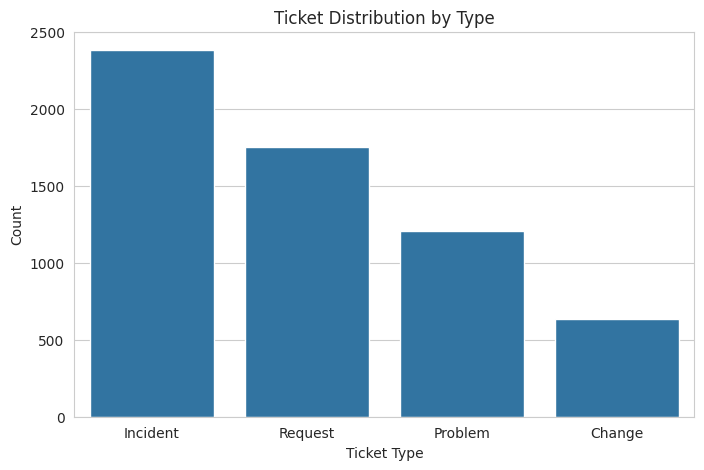

In [95]:
sns.countplot(data=df, x='Ticket_Type')
plt.title('Ticket Distribution by Type')
plt.xlabel('Ticket Type')
plt.ylabel('Count')
plt.show()


4. Ticket Distribution by Priority

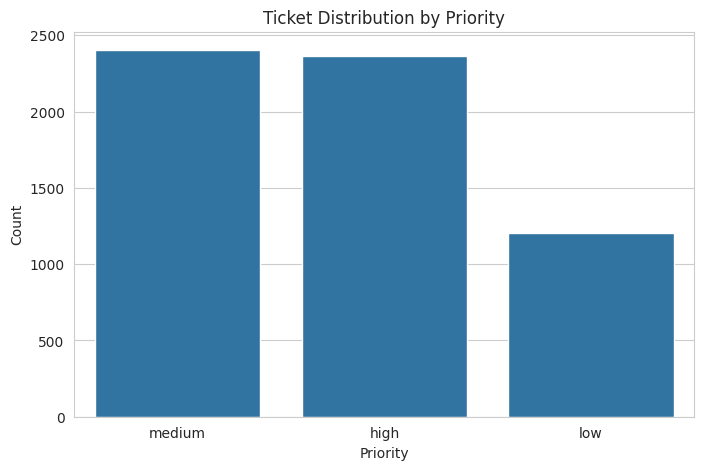

In [96]:
sns.countplot(data=df, x='Priority', order=df['Priority'].value_counts().index)
plt.title('Ticket Distribution by Priority')
plt.xlabel('Priority')
plt.ylabel('Count')
plt.show()


5. Top Categories by Frequency

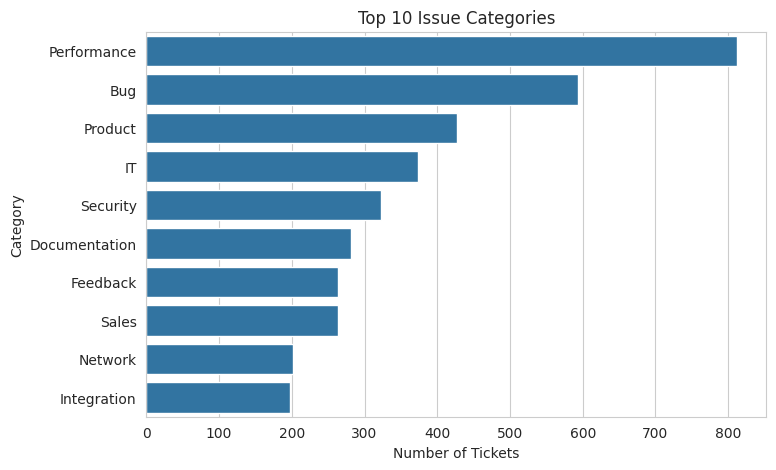

In [97]:
top_categories = df['Category'].value_counts().head(10)

sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title('Top 10 Issue Categories')
plt.xlabel('Number of Tickets')
plt.ylabel('Category')
plt.show()


6. Tickets by Queue / Assigned Team

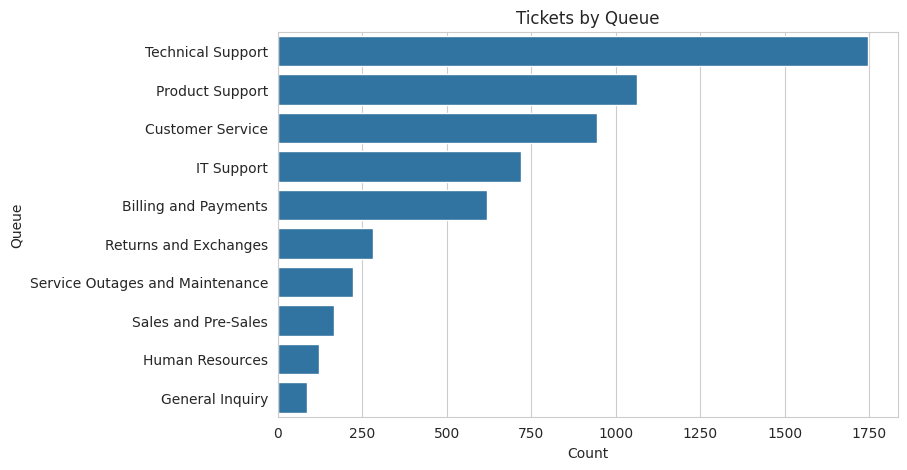

In [98]:
if 'Queue' in df.columns:
    sns.countplot(data=df, y='Queue', order=df['Queue'].value_counts().index)
    plt.title('Tickets by Queue')
    plt.xlabel('Count')
    plt.ylabel('Queue')
    plt.show()


**Module 4** Similarity & Cluster Insights

7. Average Similarity Score per Cluster

In [99]:
import pandas as pd

df = pd.read_csv('/content/infosys dataset.csv')

df['Created_Date'] = pd.to_datetime(df['Created_Date'], format='%d-%m-%Y', errors='coerce')
df['Resolved_Date'] = pd.to_datetime(df['Resolved_Date'], format='%d-%m-%Y', errors='coerce')


/tmp/ipython-input-2538101353.py:3: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/infosys dataset.csv')


In [100]:
df['Resolution_Duration'] = (df['Resolved_Date'] - df['Created_Date']).dt.days


In [101]:
median_resolution = df['Resolution_Duration'].median()
df['Resolution_Duration'].fillna(median_resolution, inplace=True)


/tmp/ipython-input-2536502624.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Resolution_Duration'].fillna(median_resolution, inplace=True)


In [102]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Category_Encoded'] = le.fit_transform(df['Category'].fillna('Unknown'))


In [103]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

# ---------- 1. PRIORITY SCORE ----------
priority_map = {'low': 1, 'medium': 2, 'high': 3}
df['Priority_Score'] = df['Priority'].astype(str).str.lower().map(priority_map)

# ---------- 2. CATEGORY ENCODING ----------
le = LabelEncoder()
df['Category_Encoded'] = le.fit_transform(df['Category'].fillna('Unknown'))

# ---------- 3. RESOLUTION DURATION ----------
df['Created_Date'] = pd.to_datetime(df['Created_Date'], format='%d-%m-%Y', errors='coerce')
df['Resolved_Date'] = pd.to_datetime(df['Resolved_Date'], format='%d-%m-%Y', errors='coerce')

df['Resolution_Duration'] = (df['Resolved_Date'] - df['Created_Date']).dt.days

# ---------- 4. FEATURE MATRIX ----------
X = df[['Priority_Score', 'Resolution_Duration', 'Category_Encoded']]

# ---------- 5. HANDLE NaNs ----------
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# ---------- 6. SCALE ----------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# ---------- 7. CLUSTER ----------
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster_ID'] = kmeans.fit_predict(X_scaled)

# ---------- 8. SIMILARITY SCORE ----------
distances = np.linalg.norm(
    X_scaled - kmeans.cluster_centers_[df['Cluster_ID']], axis=1
)
df['Similarity_Score'] = 1 / (1 + distances)

# ---------- 9. VERIFY ----------
print("Columns created successfully:")
print(df[['Priority_Score','Resolution_Duration','Category_Encoded','Cluster_ID']].head())


Columns created successfully:
   Priority_Score  Resolution_Duration  Category_Encoded  Cluster_ID
0             1.0                  0.0               189           3
1             2.0                  0.0               165           0
2             2.0                  0.0               145           0
3             3.0                  0.0                25           1
4             2.0                  0.0                40           3


In [104]:
X = df[['Priority_Score', 'Resolution_Duration', 'Category_Encoded']]


In [105]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [106]:
X_clean = X.dropna()
df = df.loc[X_clean.index]

df['Cluster_ID'] = KMeans(n_clusters=4, random_state=42)\
                    .fit_predict(X_clean)


In [107]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

# -----------------------------
# 2. Select ONLY numeric columns
# -----------------------------
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
X = df[numeric_cols]

# Safety check
assert len(X) == len(df), "Row mismatch between X and df"

# -----------------------------
# 3. Build pipeline
# -----------------------------
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=4, random_state=42))
])

# -----------------------------
# 4. Fit & predict clusters
# -----------------------------
df['Cluster_ID'] = pipeline.fit_predict(X)

# -----------------------------
# 5. Get scaled data
# -----------------------------
X_imputed = pipeline.named_steps['imputer'].transform(X)
X_scaled = pipeline.named_steps['scaler'].transform(X_imputed)

# -----------------------------
# 6. Distance to cluster centroid
# -----------------------------
kmeans_fitted = pipeline.named_steps['kmeans']
labels = df['Cluster_ID'].to_numpy()

distances = np.linalg.norm(
    X_scaled - kmeans_fitted.cluster_centers_[labels],
    axis=1
)

df['Distance_To_Centroid'] = distances

# -----------------------------
# 7. Mark anomalies (top 5%)
# -----------------------------
threshold = np.percentile(distances, 95)
df['Anomaly'] = distances > threshold

# -----------------------------
# 8. Preview result
# -----------------------------
df.head()


,Ticket_ID,Ticket_Type,Queue,Priority,Assigned_Team,Category,Status,Created_Date,Resolved_Date,Region,Resolution_Duration,Category_Encoded,Priority_Score,Cluster_ID,Similarity_Score,Distance_To_Centroid,Anomaly
0,IT001,Incident,General Inquiry,low,1 - Junior,Technical,Open,2024-06-15,2024-06-15,EU,0.0,189,1.0,2,0.256228,1.547534,False
1,IT002,Request,Customer Service,medium,2 - Regular,Sales,Open,2024-06-15,2024-06-15,NaN,0.0,165,2.0,1,0.607776,1.482569,False
2,IT003,Request,Customer Service,medium,2 - Regular,Product,In Progress,2024-06-16,2024-06-16,MEA,0.0,145,2.0,1,0.474948,0.834724,False
3,IT004,Incident,Customer Service,high,4 - Management,Breach,Resolved,2024-06-17,2024-06-17,LATAM,0.0,25,3.0,3,0.360274,0.888165,False
4,IT005,Request,Customer Service,medium,1 - Junior,Customer,In Progress,2024-06-20,2024-06-20,NaN,0.0,40,2.0,3,0.363419,0.767223,False


In [108]:
df[['Cluster_ID', 'Similarity_Score', 'Resolution_Duration']].head()


,Cluster_ID,Similarity_Score,Resolution_Duration
0,2,0.256228,0.0
1,1,0.607776,0.0
2,1,0.474948,0.0
3,3,0.360274,0.0
4,3,0.363419,0.0


In [109]:
cluster_similarity = (
    df.groupby('Cluster_ID')['Similarity_Score']
      .mean()
      .sort_values(ascending=False)
)

cluster_similarity


,Similarity_Score
Cluster_ID,
1,0.461557
3,0.313762
2,0.282032
0,0.253270


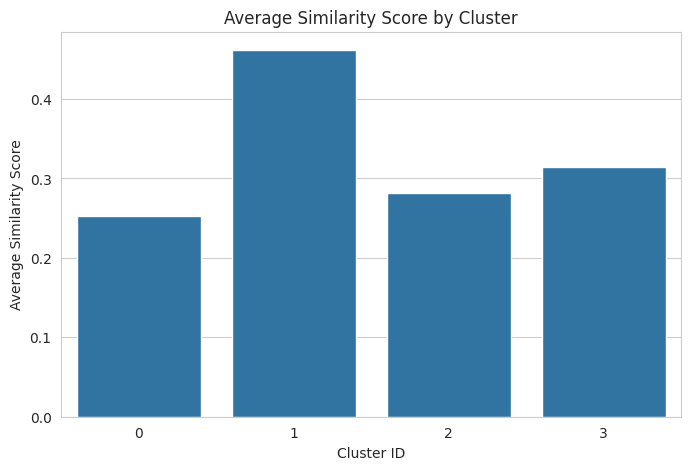

In [110]:
sns.barplot(x=cluster_similarity.index, y=cluster_similarity.values)
plt.title('Average Similarity Score by Cluster')
plt.xlabel('Cluster ID')
plt.ylabel('Average Similarity Score')
plt.show()


8. Cluster Size vs Issue Type

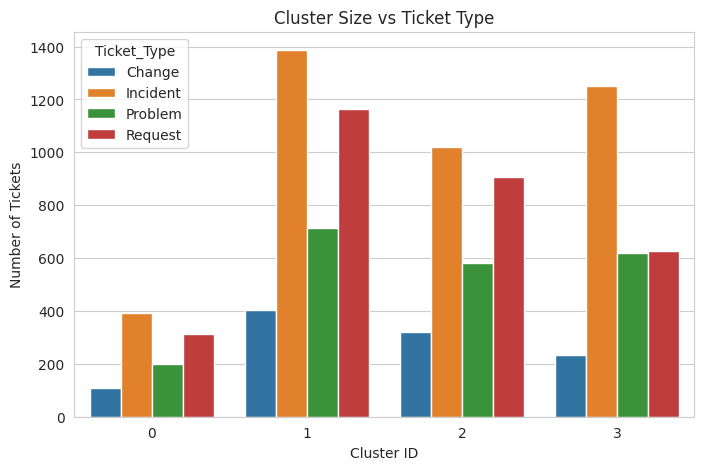

In [111]:
cluster_size = df.groupby(['Cluster_ID', 'Ticket_Type']).size().reset_index(name='Count')

sns.barplot(data=cluster_size, x='Cluster_ID', y='Count', hue='Ticket_Type')
plt.title('Cluster Size vs Ticket Type')
plt.xlabel('Cluster ID')
plt.ylabel('Number of Tickets')
plt.show()


9. Resolution Duration vs Priority (Boxplot)

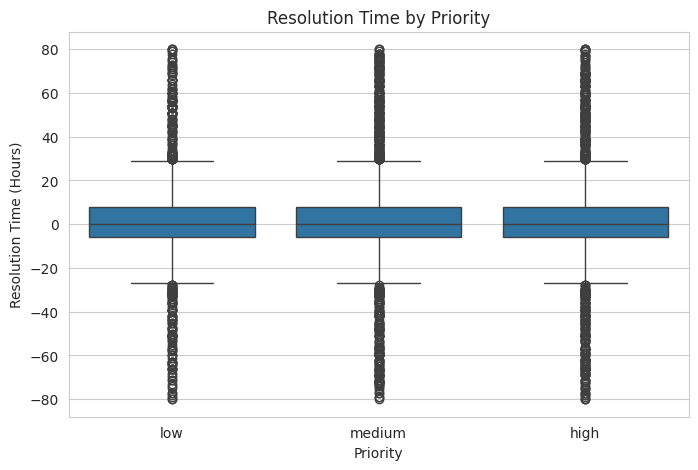

In [112]:
sns.boxplot(data=df, x='Priority', y='Resolution_Duration')
plt.title('Resolution Time by Priority')
plt.xlabel('Priority')
plt.ylabel('Resolution Time (Hours)')
plt.show()


10. Similarity Score vs Resolution Duration (Scatter)

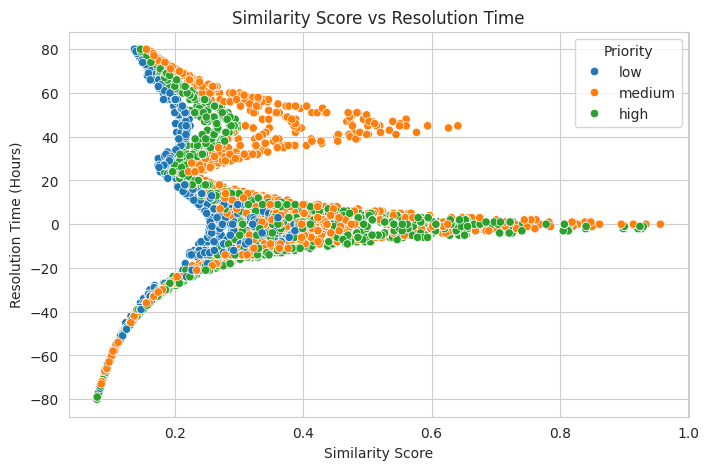

In [113]:
sns.scatterplot(data=df, x='Similarity_Score', y='Resolution_Duration', hue='Priority')
plt.title('Similarity Score vs Resolution Time')
plt.xlabel('Similarity Score')
plt.ylabel('Resolution Time (Hours)')
plt.show()


11. Cluster Performance Gap Analysis

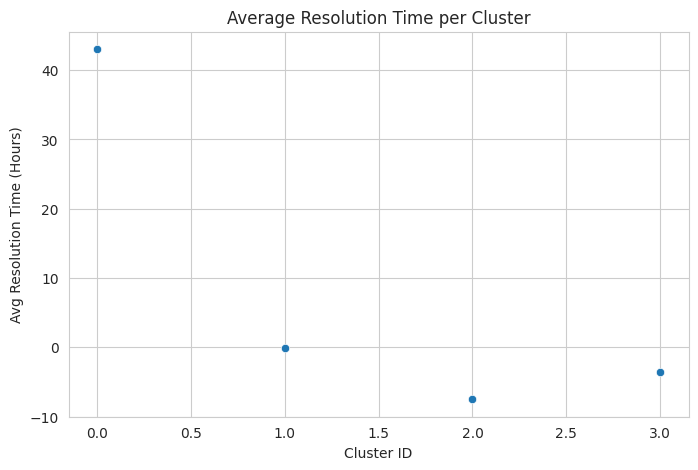

In [114]:
cluster_perf = df.groupby('Cluster_ID')['Resolution_Duration'].mean().reset_index()

sns.scatterplot(data=cluster_perf, x='Cluster_ID', y='Resolution_Duration')
plt.title('Average Resolution Time per Cluster')
plt.xlabel('Cluster ID')
plt.ylabel('Avg Resolution Time (Hours)')
plt.show()


**MILESTONE 3**

**Module 5** Performance Trend Analysis

1. Load Data

In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/cleaned_it_support_data.csv')


2. Average Resolution Time by Priority

In [116]:
priority_perf = df.groupby('Priority')['Resolution_Duration'].mean().sort_values()

priority_perf


,Resolution_Duration
Priority,
low,272.689312
high,276.704689
medium,296.149813


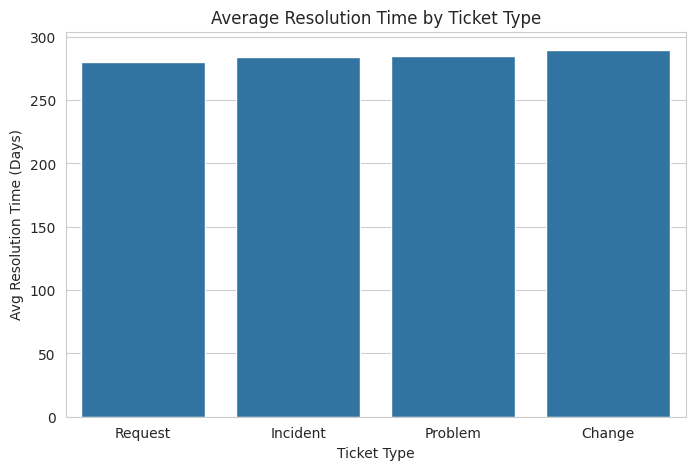

In [117]:
sns.barplot(
    x=df.groupby('Ticket_Type')['Resolution_Duration'].mean().sort_values().index,
    y=df.groupby('Ticket_Type')['Resolution_Duration'].mean().sort_values().values
)
plt.title("Average Resolution Time by Ticket Type")
plt.xlabel("Ticket Type")
plt.ylabel("Avg Resolution Time (Days)")
plt.show()


3. Average Resolution Time by Ticket Type

In [118]:
type_perf = df.groupby('Ticket_Type')['Resolution_Duration'].mean().sort_values()

type_perf


,Resolution_Duration
Ticket_Type,
Request,279.762828
Incident,284.371273
Problem,285.054726
Change,289.584906


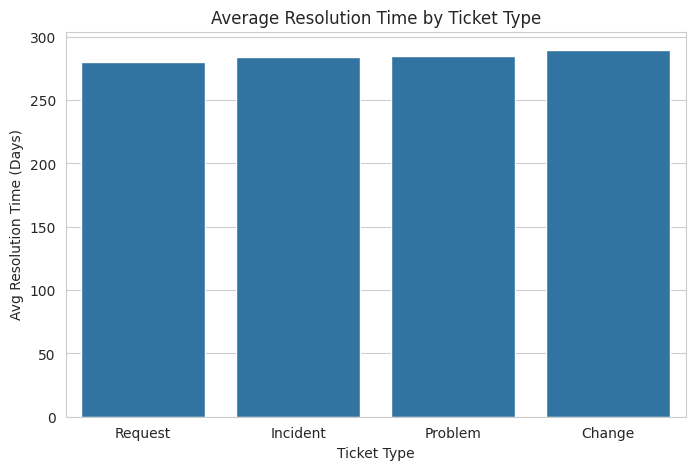

In [119]:
sns.barplot(x=type_perf.index, y=type_perf.values)
plt.title("Average Resolution Time by Ticket Type")
plt.xlabel("Ticket Type")
plt.ylabel("Avg Resolution Time (Days)")
plt.show()


4. Fastest Handling Teams

In [120]:
team_perf = df.groupby('Assigned_Team')['Resolution_Duration'].mean().sort_values()

team_perf.head()


,Resolution_Duration
Assigned_Team,
1 - Junior,268.044482
4 - Management,284.891803
2 - Regular,287.149144
3 - Senior,291.153439


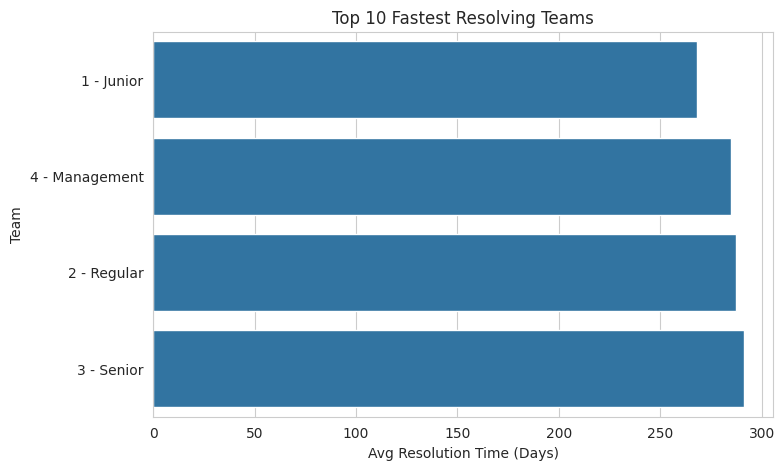

In [121]:
sns.barplot(x=team_perf.head(10).values, y=team_perf.head(10).index)
plt.title("Top 10 Fastest Resolving Teams")
plt.xlabel("Avg Resolution Time (Days)")
plt.ylabel("Team")
plt.show()


5.High-Priority Unresolved Issues

In [122]:
high_priority_unresolved = df[
    (df['Priority'] == 'high') &
    (df['Status'] != 'Resolved')
]

high_priority_unresolved[['Ticket_ID', 'Assigned_Team', 'Category']].head()


,Ticket_ID,Assigned_Team,Category
7,IT009,2 - Regular,Bug
8,IT010,3 - Senior,Performance
10,IT012,2 - Regular,Bug
12,IT018,2 - Regular,Crash
13,IT019,4 - Management,Security


In [123]:
high_priority_unresolved.shape


(1764, 13)

6. Count of Unresolved High Priority Tickets

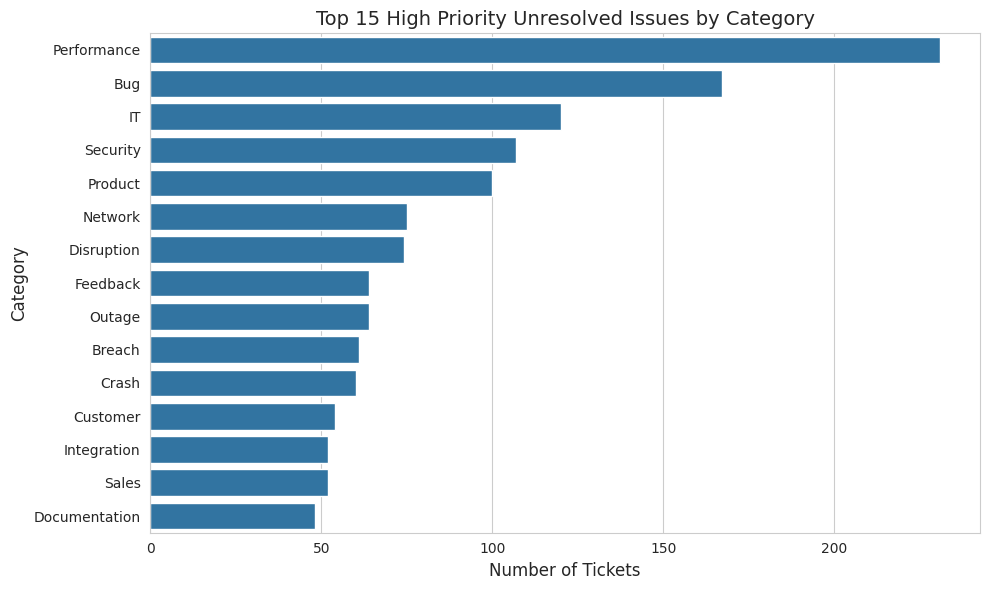

In [124]:
# Count high-priority unresolved by category
category_counts = high_priority_unresolved['Category'].value_counts().head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.values, y=category_counts.index)
plt.title("Top 15 High Priority Unresolved Issues by Category", fontsize=14)
plt.xlabel("Number of Tickets", fontsize=12)
plt.ylabel("Category", fontsize=12)
plt.tight_layout()
plt.show()


**Module 6  Geographic & Category-Level Insights**

7. Ticket Concentration by Queue (Region Proxy)

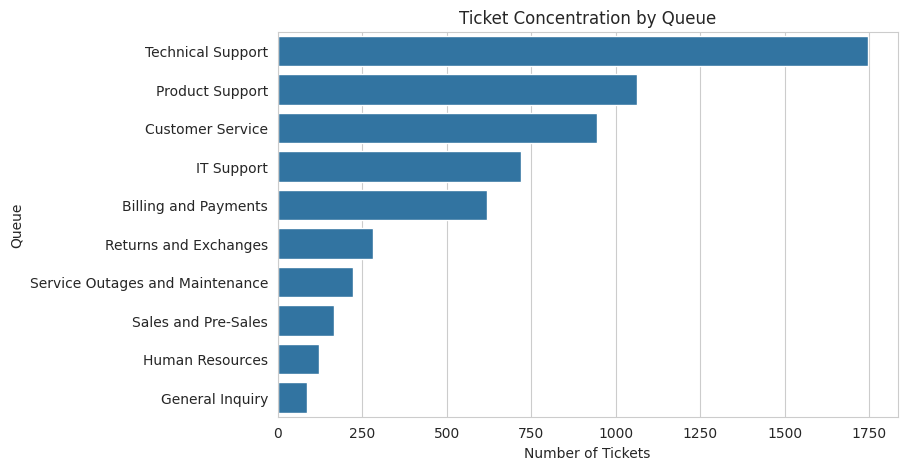

In [125]:
queue_dist = df['Queue'].value_counts()

sns.barplot(x=queue_dist.values, y=queue_dist.index)
plt.title("Ticket Concentration by Queue")
plt.xlabel("Number of Tickets")
plt.ylabel("Queue")
plt.show()


8. Category vs Resolution Time

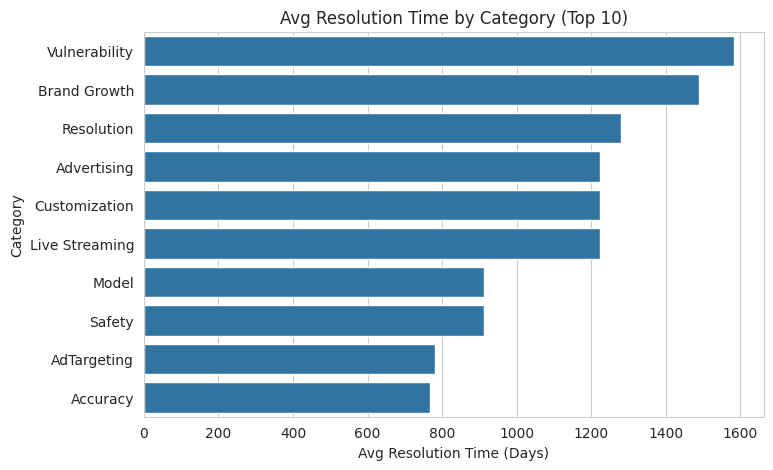

In [126]:
category_perf = df.groupby('Category')['Resolution_Duration'].mean().sort_values(ascending=False)

sns.barplot(x=category_perf.head(10).values, y=category_perf.head(10).index)
plt.title("Avg Resolution Time by Category (Top 10)")
plt.xlabel("Avg Resolution Time (Days)")
plt.ylabel("Category")
plt.show()


In [127]:
# Convert date columns (adjust format if needed)
df['Created_Date'] = pd.to_datetime(df['Created_Date'], format='%d-%m-%Y', errors='coerce')
df['Resolved_Date'] = pd.to_datetime(df['Resolved_Date'], format='%d-%m-%Y', errors='coerce')

# Create Resolution Duration in days
df['Resolution_Duration'] = (df['Resolved_Date'] - df['Created_Date']).dt.days


In [128]:
median_duration = df['Resolution_Duration'].median()
df['Resolution_Duration'] = df['Resolution_Duration'].fillna(median_duration)


In [129]:
priority_perf = df.groupby('Priority')['Resolution_Duration'].mean().sort_values()
priority_perf


,Resolution_Duration
Priority,
high,NaN
low,NaN
medium,NaN


In [158]:
# Priority Score
priority_map = {'low': 1, 'medium': 2, 'high': 3}
df['Priority_Score'] = df['Priority'].map(priority_map)

# Encode Category
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Category_Encoded'] = le.fit_transform(df['Category'].fillna('Unknown'))

# Resolution Duration
df['Created_Date'] = pd.to_datetime(df['Created_Date'], format='%d-%m-%Y', errors='coerce')
df['Resolved_Date'] = pd.to_datetime(df['Resolved_Date'], format='%d-%m-%Y', errors='coerce')

df['Resolution_Duration'] = (df['Resolved_Date'] - df['Created_Date']).dt.days
df['Resolution_Duration'] = df['Resolution_Duration'].fillna(df['Resolution_Duration'].median())


In [159]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold



# -----------------------------
# 2. Select numeric columns only
# -----------------------------
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
X = df[numeric_cols]

# -----------------------------
# 3. Build pipeline (KEY FIX HERE)
# -----------------------------
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('variance', VarianceThreshold(threshold=0.0)),  # removes constant cols
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=4, random_state=42))
])

# -----------------------------
# 4. Fit & predict clusters
# -----------------------------
df['Cluster_ID'] = pipeline.fit_predict(X)

# -----------------------------
# 5. Recreate scaled data safely
# -----------------------------
X_imputed = pipeline.named_steps['imputer'].transform(X)
X_var = pipeline.named_steps['variance'].transform(X_imputed)
X_scaled = pipeline.named_steps['scaler'].transform(X_var)

# -----------------------------
# 6. Distance to own centroid
# -----------------------------
kmeans_fitted = pipeline.named_steps['kmeans']
labels = df['Cluster_ID'].to_numpy()

distances = np.linalg.norm(
    X_scaled - kmeans_fitted.cluster_centers_[labels],
    axis=1
)

df['Distance_To_Centroid'] = distances

# -----------------------------
# 7. Flag anomalies (top 5%)
# -----------------------------
threshold = np.percentile(distances, 95)
df['Anomaly'] = distances > threshold

# -----------------------------
# 8. Done
# -----------------------------
df.head()


,Ticket_ID,Ticket_Type,Queue,Priority,Assigned_Team,Category,Status,Created_Date,Resolved_Date,Region,Priority_Score,Category_Encoded,Resolution_Duration,Cluster_ID,Distance_To_Centroid,Anomaly
0,IT001,Incident,General Inquiry,low,1 - Junior,Technical,Open,2024-06-15,2024-06-15,EU,1.0,189,0.0,3,2.902779,True
1,IT002,Request,Customer Service,medium,2 - Regular,Sales,Open,2024-06-15,2024-06-15,NaN,2.0,165,0.0,0,0.645342,False
2,IT003,Request,Customer Service,medium,2 - Regular,Product,In Progress,2024-06-16,2024-06-16,MEA,2.0,145,0.0,0,1.105493,False
3,IT004,Incident,Customer Service,high,4 - Management,Breach,Resolved,2024-06-17,2024-06-17,LATAM,3.0,25,0.0,1,1.775666,False
4,IT005,Request,Customer Service,medium,1 - Junior,Customer,In Progress,2024-06-20,2024-06-20,NaN,2.0,40,0.0,3,1.751644,False


9. Cluster Size vs Performance

In [161]:
cluster_size = df['Cluster_ID'].value_counts().sort_index()
cluster_perf = df.groupby('Cluster_ID')['Resolution_Duration'].mean().sort_index()


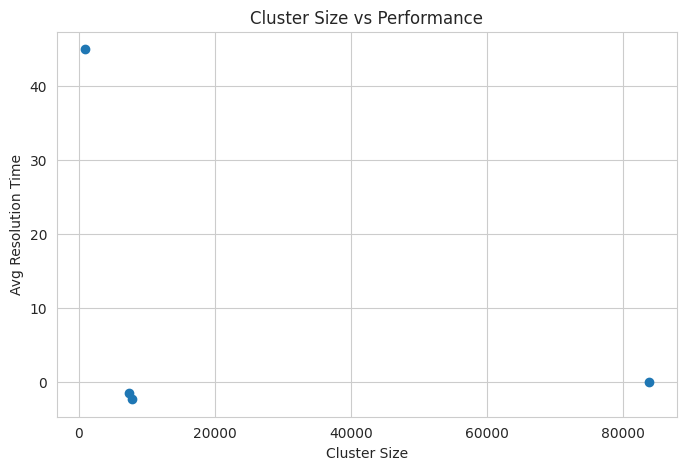

In [162]:
plt.scatter(cluster_size, cluster_perf)
plt.xlabel("Cluster Size")
plt.ylabel("Avg Resolution Time")
plt.title("Cluster Size vs Performance")
plt.show()


10. Performance Gaps Across Clusters (Boxplot)

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt

plot_df = df[['Cluster_ID', 'Resolution_Duration']].copy()

plot_df['Resolution_Duration'] = pd.to_numeric(
    plot_df['Resolution_Duration'], errors='coerce'
)

plot_df = plot_df.dropna(subset=['Cluster_ID', 'Resolution_Duration'])


In [135]:
df['Resolution_Duration'] = pd.to_numeric(
    df['Resolution_Duration'], errors='coerce'
)


In [136]:
df = df[df['Resolution_Duration'] >= 0]


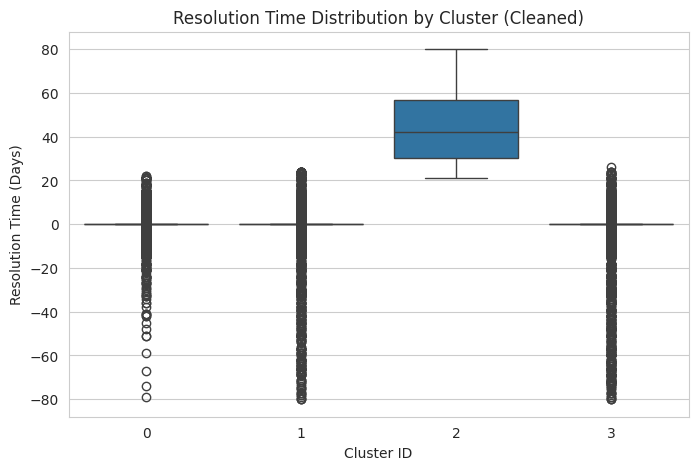

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt

plot_df = df[['Cluster_ID', 'Resolution_Duration']].dropna()

sns.boxplot(
    data=plot_df,
    x='Cluster_ID',
    y='Resolution_Duration'
)

plt.title("Resolution Time Distribution by Cluster (Cleaned)")
plt.xlabel("Cluster ID")
plt.ylabel("Resolution Time (Days)")
plt.show()


In [139]:
df.groupby('Cluster_ID')['Resolution_Duration'].describe()


,count,mean,std,min,25%,50%,75%,max


In [140]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [141]:
# Normalize text columns
df['Region'] = df['Region'].astype(str).str.strip()
df['Priority'] = df['Priority'].astype(str).str.lower()


In [166]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('infosys dataset.csv')
df.head()

Saving infosys dataset.csv to infosys dataset (4).csv


/tmp/ipython-input-1749417901.py:3: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('infosys dataset.csv')


,Ticket_ID,Ticket_Type,Queue,Priority,Assigned_Team,Category,Status,Created_Date,Resolved_Date,Region
0,IT001,Incident,General Inquiry,low,1 - Junior,Technical,Open,15-06-2024,15-06-2024,EU
1,IT002,Request,Customer Service,medium,2 - Regular,Sales,Open,15-06-2024,15-06-2024,NaN
2,IT003,Request,Customer Service,medium,2 - Regular,Product,In Progress,16-06-2024,16-06-2024,MEA
3,IT004,Incident,Customer Service,high,4 - Management,Breach,Resolved,17-06-2024,17-06-2024,LATAM
4,IT005,Request,Customer Service,medium,1 - Junior,Customer,In Progress,20-06-2024,20-06-2024,NaN


In [167]:
print(df['Region'].unique())
print(df['Priority'].unique())


['EU' nan 'MEA' 'LATAM' 'APAC']
['low' 'medium' 'high' nan]


In [168]:
region_counts = (
    df.groupby('Region')
      .size()
      .reset_index(name='Ticket_Count')
)

region_counts


,Region,Ticket_Count
0,APAC,19933
1,EU,19960
2,LATAM,19959
3,MEA,20151


In [171]:
region_country_map = {
    'EU': 'France',
    'NA': 'United States',
    'APAC': 'India',
    'LATAM': 'Brazil',
    'MEA': 'South Africa'
}

region_counts['Country'] = region_counts['Region'].map(region_country_map)
region_counts


,Region,Ticket_Count,Mapped_Region,Country
0,APAC,19933,Asia,India
1,EU,19960,Europe,France
2,LATAM,19959,South America,Brazil
3,MEA,20151,Africa,South Africa


In [172]:
import plotly.express as px

fig = px.choropleth(
    region_counts,
    locations='Country',
    locationmode='country names',
    color='Ticket_Count',
    hover_name='Region',
    color_continuous_scale='Blues',
    title='Ticket Distribution by Region (Representative Countries)'
)

fig.show()


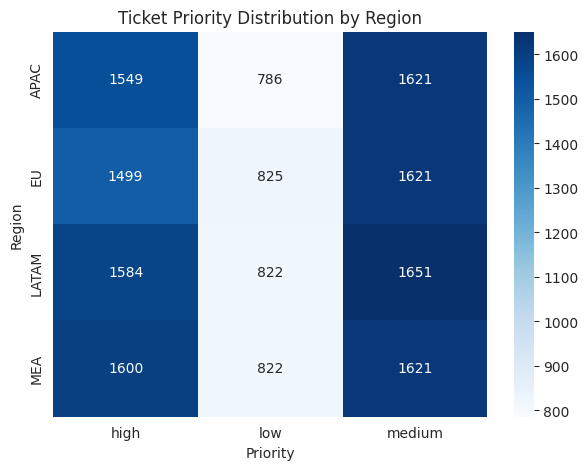

In [148]:
pivot = pd.pivot_table(
    df,
    index='Region',
    columns='Priority',
    values='Ticket_ID',
    aggfunc='count',
    fill_value=0
)

plt.figure(figsize=(7,5))
sns.heatmap(pivot, annot=True, fmt='d', cmap='Blues')
plt.title("Ticket Priority Distribution by Region")
plt.show()


PRIORITY DISTRIBUTION BY REGION

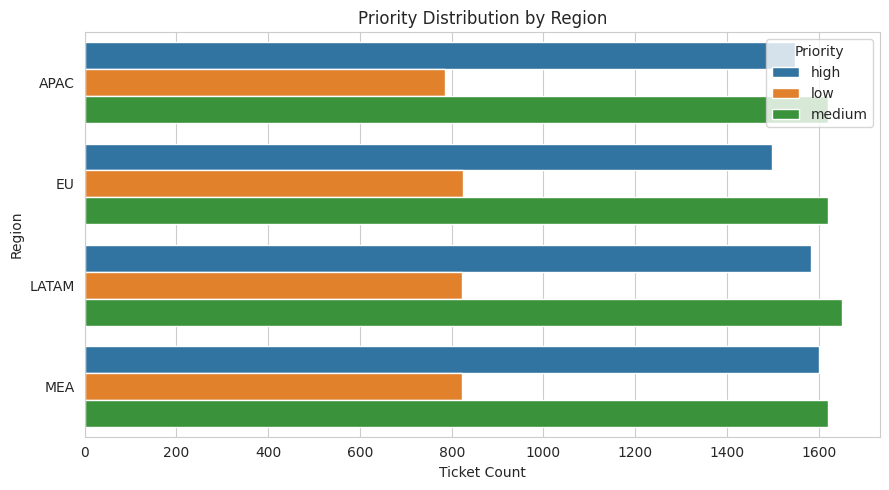

In [149]:
priority_region = (
    df.groupby(['Region', 'Priority'])
      .size()
      .reset_index(name='Count')
)

plt.figure(figsize=(9,5))
sns.barplot(
    data=priority_region,
    x='Count',
    y='Region',
    hue='Priority'
)
plt.title("Priority Distribution by Region")
plt.xlabel("Ticket Count")
plt.ylabel("Region")
plt.tight_layout()
plt.show()


TICKET DISTRIBUTION BY REGION

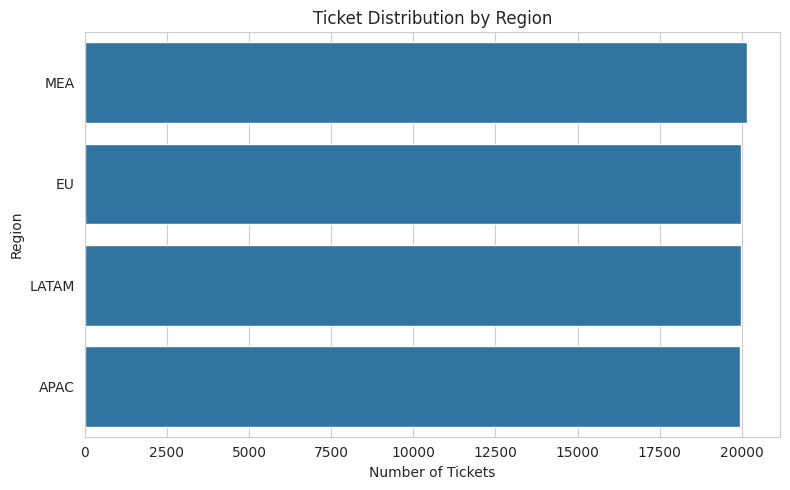

In [150]:
region_counts = df['Region'].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(
    x=region_counts.values,
    y=region_counts.index
)
plt.title("Ticket Distribution by Region")
plt.xlabel("Number of Tickets")
plt.ylabel("Region")
plt.tight_layout()
plt.show()
